# مقدمه‌ای بر احتمال و آمار  
در این دفترچه، با برخی از مفاهیمی که قبلاً درباره آن‌ها صحبت کرده‌ایم، کار خواهیم کرد. بسیاری از مفاهیم احتمال و آمار به‌خوبی در کتابخانه‌های اصلی پردازش داده در پایتون، مانند `numpy` و `pandas`، پیاده‌سازی شده‌اند.  


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## متغیرهای تصادفی و توزیع‌ها  
بیایید با نمونه‌گیری ۳۰ مقدار از یک توزیع یکنواخت از ۰ تا ۹ شروع کنیم. همچنین میانگین و واریانس را محاسبه خواهیم کرد.  


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


برای تخمین بصری تعداد مقادیر مختلف موجود در نمونه، می‌توانیم **هیستوگرام** را رسم کنیم:


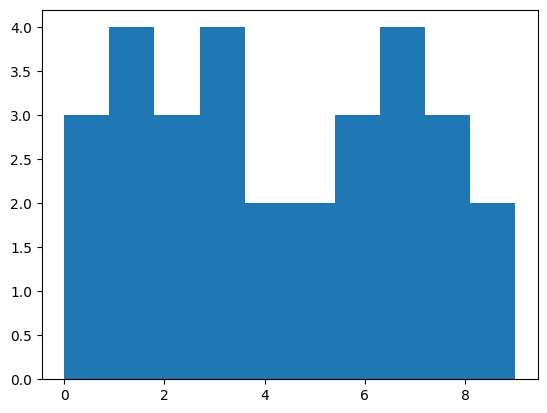

In [119]:
plt.hist(sample)
plt.show()

## تحلیل داده‌های واقعی

میانگین و واریانس هنگام تحلیل داده‌های دنیای واقعی بسیار مهم هستند. بیایید داده‌های مربوط به بازیکنان بیسبال را از [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights) بارگذاری کنیم.


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> ما در اینجا از یک بسته به نام [**Pandas**](https://pandas.pydata.org/) برای تحلیل داده‌ها استفاده می‌کنیم. در ادامه این دوره، بیشتر درباره Pandas و کار با داده‌ها در پایتون صحبت خواهیم کرد.

بیایید مقادیر میانگین برای سن، قد و وزن را محاسبه کنیم:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

حالا بیایید روی قد تمرکز کنیم و انحراف معیار و واریانس را محاسبه کنیم:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


علاوه بر میانگین، منطقی است که به مقدار میانه و چارک‌ها نیز نگاه کنیم. می‌توان آن‌ها را با استفاده از یک **نمودار جعبه‌ای** نمایش داد:


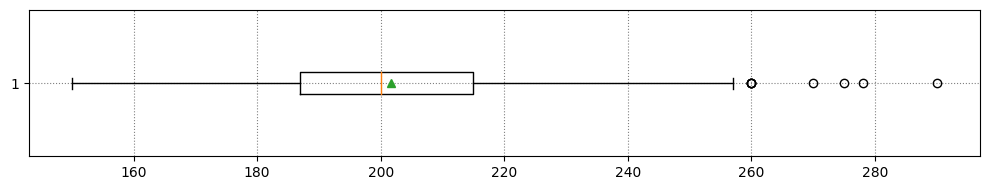

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

ما همچنین می‌توانیم نمودارهای جعبه‌ای از زیرمجموعه‌های داده‌های خود ایجاد کنیم، برای مثال، بر اساس نقش بازیکن گروه‌بندی کنیم.


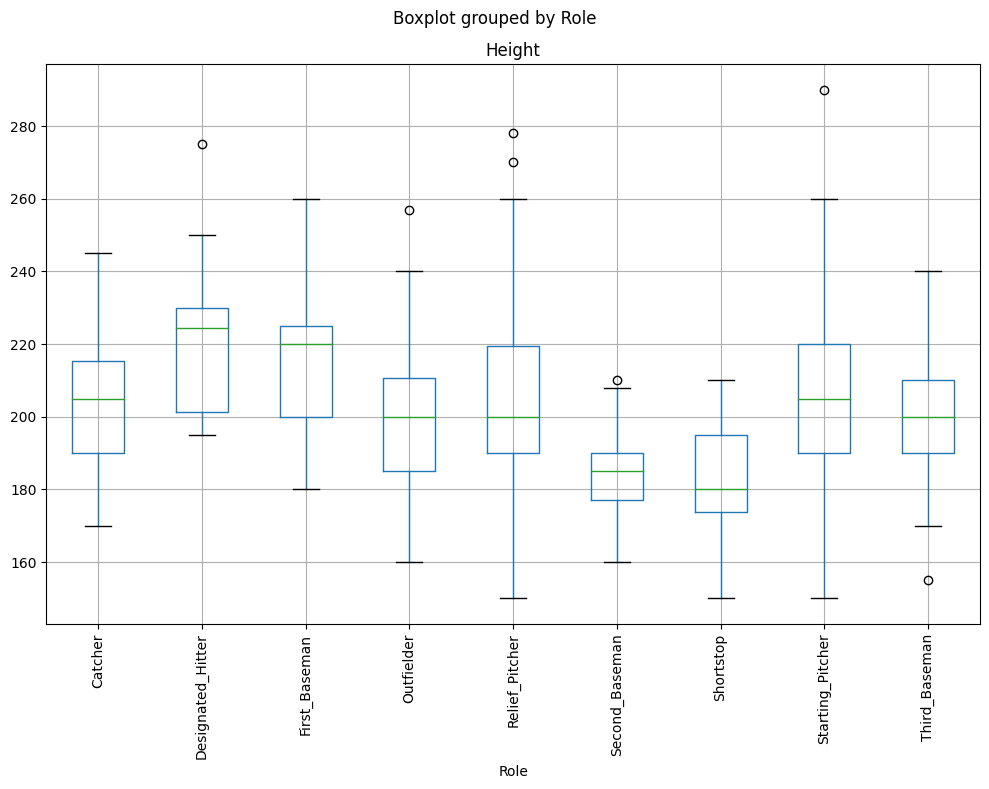

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **توجه**: این نمودار نشان می‌دهد که به طور میانگین، قد بازیکنان پست اول بیشتر از قد بازیکنان پست دوم است. بعداً یاد خواهیم گرفت که چگونه می‌توان این فرضیه را به صورت رسمی‌تر آزمایش کرد و نشان داد که داده‌های ما از نظر آماری معنادار هستند تا این موضوع را اثبات کنند.

سن، قد و وزن همگی متغیرهای تصادفی پیوسته هستند. به نظر شما توزیع آن‌ها چگونه است؟ یک روش خوب برای فهمیدن این موضوع رسم هیستوگرام مقادیر است:


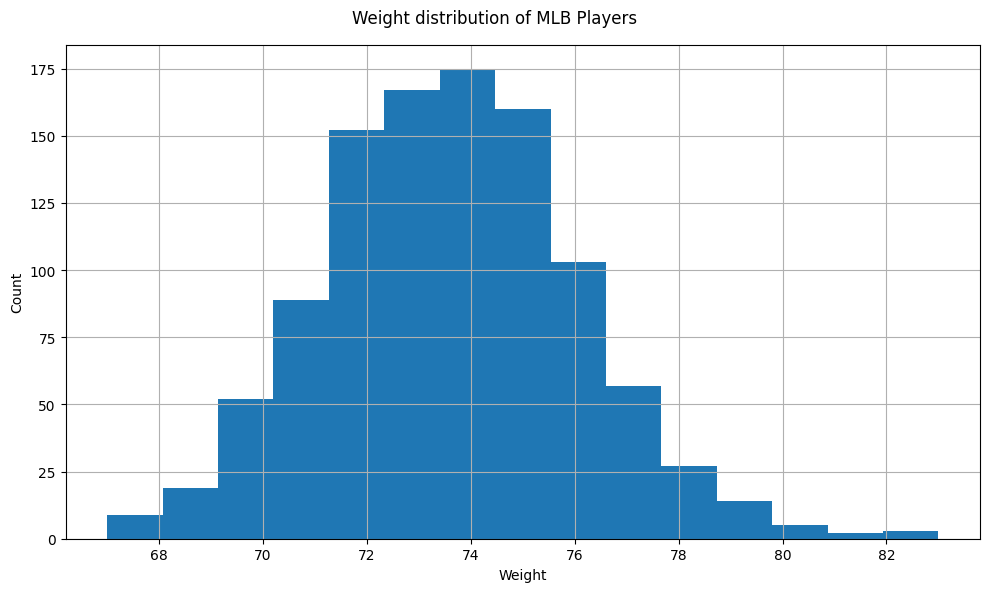

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## توزیع نرمال

بیایید یک نمونه مصنوعی از وزن‌ها ایجاد کنیم که از یک توزیع نرمال با همان میانگین و واریانس داده‌های واقعی ما پیروی کند:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

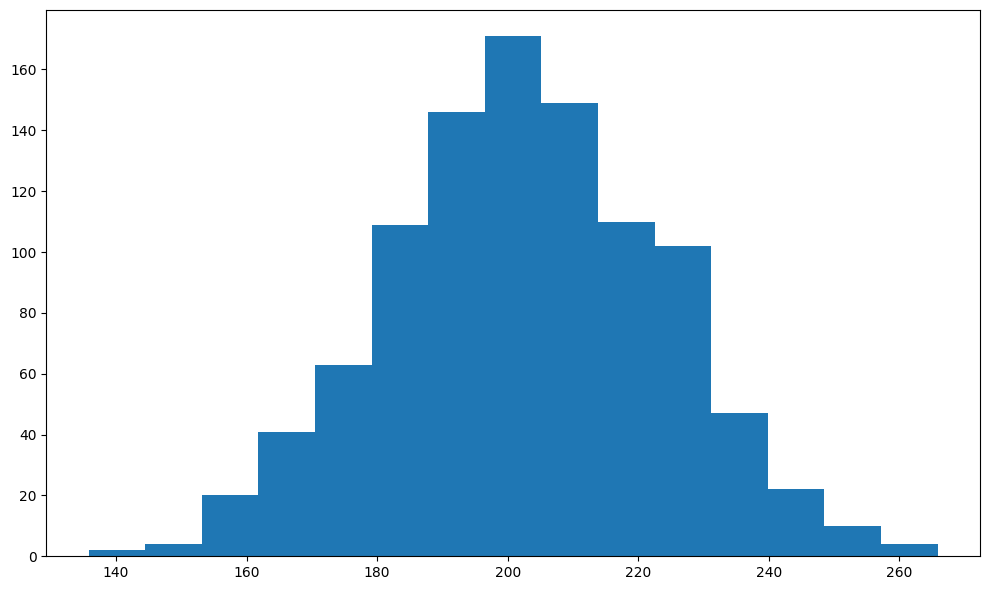

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

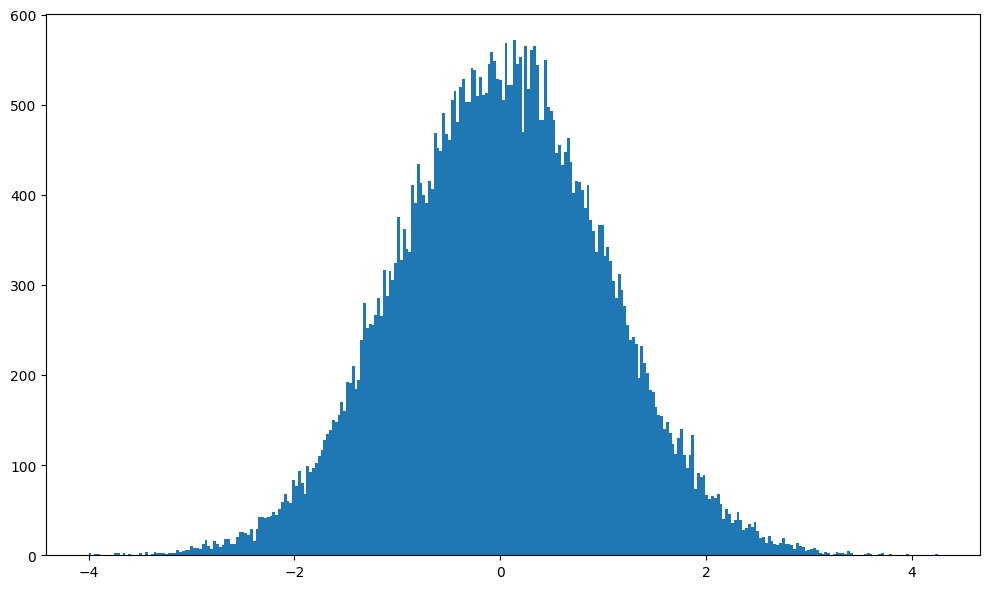

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

از آنجا که بیشتر مقادیر در زندگی واقعی به طور نرمال توزیع شده‌اند، نباید از یک تولیدکننده اعداد تصادفی یکنواخت برای تولید داده‌های نمونه استفاده کنیم. این چیزی است که اتفاق می‌افتد اگر بخواهیم وزن‌ها را با یک توزیع یکنواخت (تولید شده توسط `np.random.rand`) تولید کنیم:


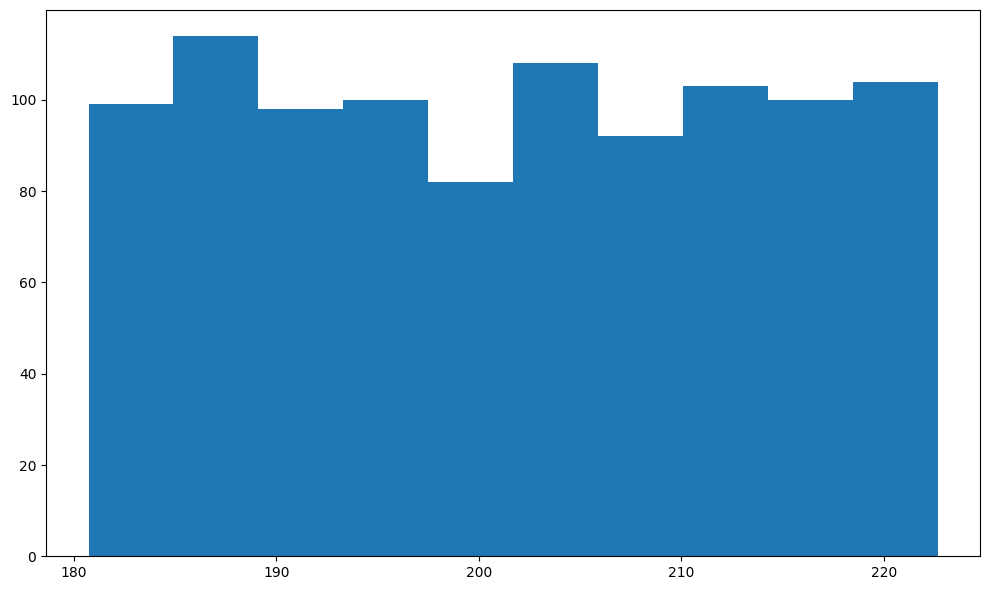

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## بازه‌های اطمینان

حالا بیایید بازه‌های اطمینان برای وزن‌ها و قدهای بازیکنان بیسبال محاسبه کنیم. از کدی که [در این بحث در stackoverflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data) آمده است استفاده خواهیم کرد:


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## آزمون فرضیه

بیایید نقش‌های مختلف در مجموعه داده بازیکنان بیسبال خود را بررسی کنیم:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

بیایید فرضیه‌ای را آزمایش کنیم که می‌گوید بازیکنان بیس اول از بازیکنان بیس دوم بلندتر هستند. ساده‌ترین راه برای انجام این کار، آزمایش بازه‌های اطمینان است:


In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


ما می‌توانیم ببینیم که بازه‌ها با یکدیگر همپوشانی ندارند.

یک روش آماری دقیق‌تر برای اثبات این فرضیه استفاده از **آزمون t استیودنت** است:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


دو مقداری که توسط تابع `ttest_ind` بازگردانده می‌شوند عبارتند از:  
* مقدار p را می‌توان به‌عنوان احتمال اینکه دو توزیع میانگین یکسانی داشته باشند در نظر گرفت. در مورد ما، این مقدار بسیار کم است، به این معنی که شواهد قوی‌ای وجود دارد که نشان می‌دهد بازیکنان بیس اول بلندتر هستند.  
* مقدار t یک مقدار میانی از تفاوت میانگین نرمال‌شده است که در آزمون t استفاده می‌شود و با یک مقدار آستانه برای یک سطح اطمینان مشخص مقایسه می‌شود.  


## شبیه‌سازی توزیع نرمال با استفاده از قضیه حد مرکزی

مولد شبه‌تصادفی در پایتون به گونه‌ای طراحی شده است که به ما یک توزیع یکنواخت بدهد. اگر بخواهیم یک مولد برای توزیع نرمال ایجاد کنیم، می‌توانیم از قضیه حد مرکزی استفاده کنیم. برای به دست آوردن یک مقدار با توزیع نرمال، کافی است میانگین یک نمونه تولیدشده به صورت یکنواخت را محاسبه کنیم.


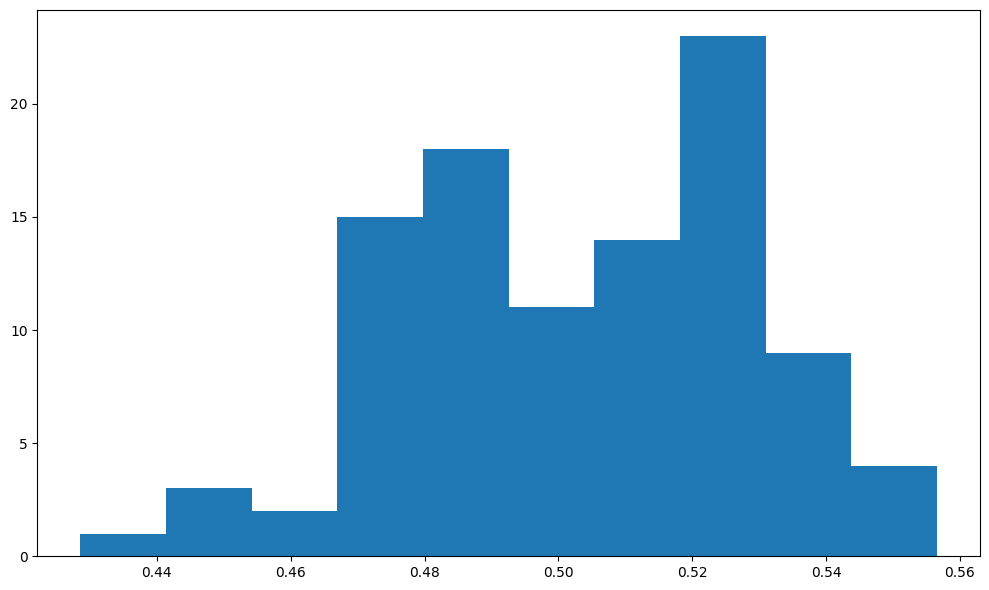

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## همبستگی و شرکت شیطانی بیسبال

همبستگی به ما امکان می‌دهد روابط بین دنباله‌های داده را پیدا کنیم. در مثال ساده ما، فرض کنید یک شرکت شیطانی بیسبال وجود دارد که به بازیکنان خود بر اساس قدشان حقوق می‌دهد - هرچه بازیکن قد بلندتر باشد، پول بیشتری دریافت می‌کند. فرض کنید یک حقوق پایه به مبلغ ۱۰۰۰ دلار وجود دارد و یک پاداش اضافی از ۰ تا ۱۰۰ دلار، بسته به قد. ما بازیکنان واقعی MLB را در نظر می‌گیریم و حقوق خیالی آنها را محاسبه می‌کنیم:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


بیایید اکنون کوواریانس و همبستگی این توالی‌ها را محاسبه کنیم. `np.cov` ماتریسی به نام **ماتریس کوواریانس** به ما می‌دهد که تعمیمی از کوواریانس برای چندین متغیر است. عنصر $M_{ij}$ در ماتریس کوواریانس $M$ نشان‌دهنده همبستگی بین متغیرهای ورودی $X_i$ و $X_j$ است و مقادیر قطری $M_{ii}$ واریانس $X_{i}$ را نشان می‌دهند. به همین ترتیب، `np.corrcoef` ماتریس **همبستگی** را به ما می‌دهد.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


یک همبستگی برابر با ۱ به این معناست که یک **رابطه خطی** قوی بین دو متغیر وجود دارد. ما می‌توانیم رابطه خطی را با رسم یک مقدار در مقابل دیگری به صورت بصری مشاهده کنیم:


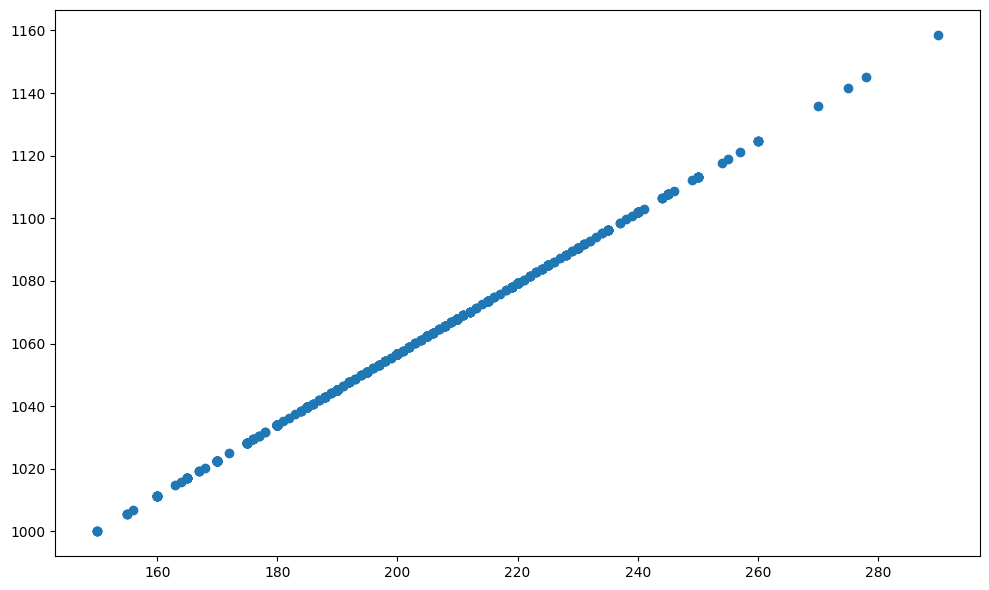

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

بیایید ببینیم چه اتفاقی می‌افتد اگر رابطه خطی نباشد. فرض کنید شرکت ما تصمیم گرفته است وابستگی خطی آشکار بین قد و حقوق را پنهان کند و مقداری غیرخطی بودن مانند `sin` را به فرمول اضافه کند:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


در این مورد، همبستگی کمی کمتر است، اما هنوز هم نسبتاً بالا است. حالا، برای کمتر آشکار کردن رابطه، ممکن است بخواهیم با اضافه کردن یک متغیر تصادفی به حقوق، کمی تصادفی بودن اضافه کنیم. بیایید ببینیم چه اتفاقی می‌افتد:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


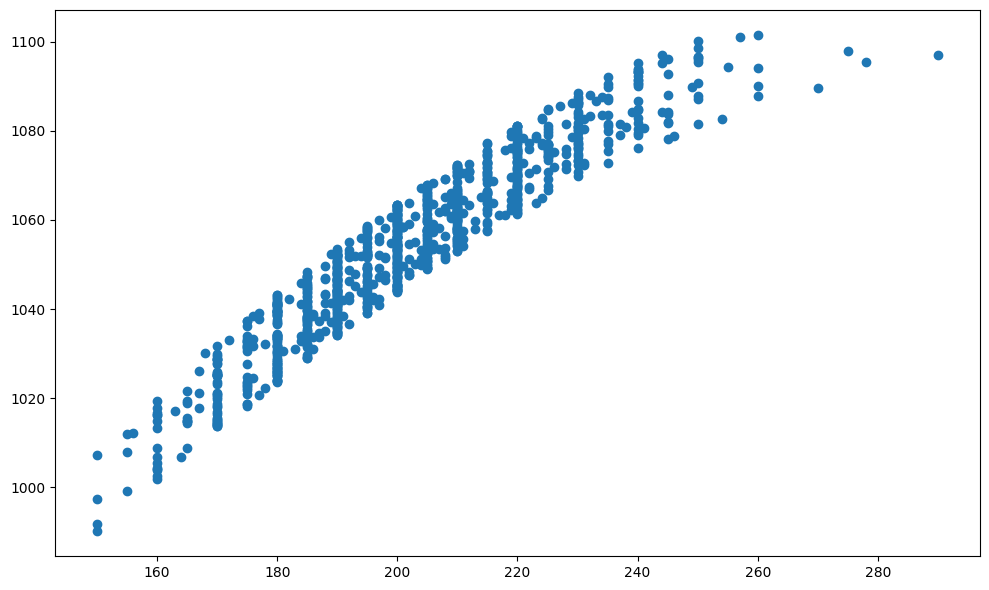

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

آیا می‌توانید حدس بزنید چرا نقطه‌ها به صورت خطوط عمودی مرتب می‌شوند؟

ما ارتباط بین یک مفهوم مصنوعی مانند حقوق و متغیر مشاهده‌شده *قد* را بررسی کرده‌ایم. حالا بیایید ببینیم آیا دو متغیر مشاهده‌شده، مانند قد و وزن، نیز با یکدیگر ارتباط دارند:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

متأسفانه، هیچ نتیجه‌ای به دست نیاوردیم - فقط چند مقدار عجیب `nan`. این به این دلیل است که برخی از مقادیر در سری ما تعریف نشده‌اند و به صورت `nan` نمایش داده می‌شوند، که باعث می‌شود نتیجه عملیات نیز تعریف نشده باشد. با نگاه کردن به ماتریس می‌توانیم ببینیم که ستون `Weight` مشکل‌ساز است، زیرا خودهمبستگی بین مقادیر `Height` محاسبه شده است.

> این مثال اهمیت **آماده‌سازی داده‌ها** و **پاکسازی داده‌ها** را نشان می‌دهد. بدون داده‌های مناسب نمی‌توانیم هیچ محاسبه‌ای انجام دهیم.

بیایید از متد `fillna` برای پر کردن مقادیر گمشده استفاده کنیم و همبستگی را محاسبه کنیم:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

در واقع یک همبستگی وجود دارد، اما نه به اندازه‌ای قوی که در مثال مصنوعی ما دیده می‌شود. در حقیقت، اگر به نمودار پراکندگی یک مقدار در مقابل مقدار دیگر نگاه کنیم، رابطه بسیار کمتر واضح خواهد بود:


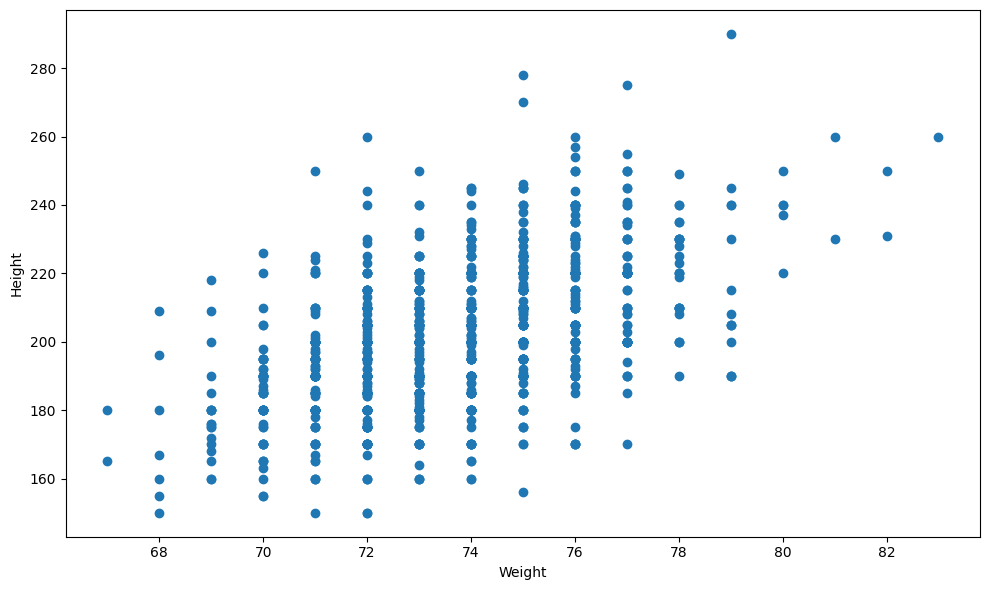

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## نتیجه‌گیری

در این نوت‌بوک یاد گرفتیم که چگونه عملیات پایه‌ای روی داده‌ها انجام دهیم تا توابع آماری را محاسبه کنیم. اکنون می‌دانیم که چگونه از ابزارهای قوی ریاضی و آمار برای اثبات برخی فرضیه‌ها استفاده کنیم و همچنین چطور بازه‌های اطمینان را برای متغیرهای دلخواه با توجه به یک نمونه داده محاسبه کنیم.



---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما تلاش می‌کنیم دقت را حفظ کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است حاوی خطاها یا نادقتی‌هایی باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، ترجمه حرفه‌ای انسانی توصیه می‌شود. ما هیچ مسئولیتی در قبال سوءتفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
